In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
data = data[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
           'highway MPG', 'city mpg', 'MSRP']]

In [5]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [6]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [7]:
data = data.fillna(0)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [8]:
data.rename(columns={'msrp': 'price'}, inplace=True)
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


## Question 1
What is the most frequent observation (mode) for the column `transmission_type`?

In [9]:
data["transmission_type"].mode()[0]

'AUTOMATIC'

## Question 2
What are the two features that have the biggest correlation in this dataset?

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   price              11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [12]:
numerical_columns = data.select_dtypes(include=["number"]).columns.to_list()
categorical_columns = data.select_dtypes(include=["object"]).columns.to_list()

print("Numerical columns:", numerical_columns, "\n")
print("Categorical columns:", categorical_columns)

Numerical columns: ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price'] 

Categorical columns: ['make', 'model', 'transmission_type', 'vehicle_style']


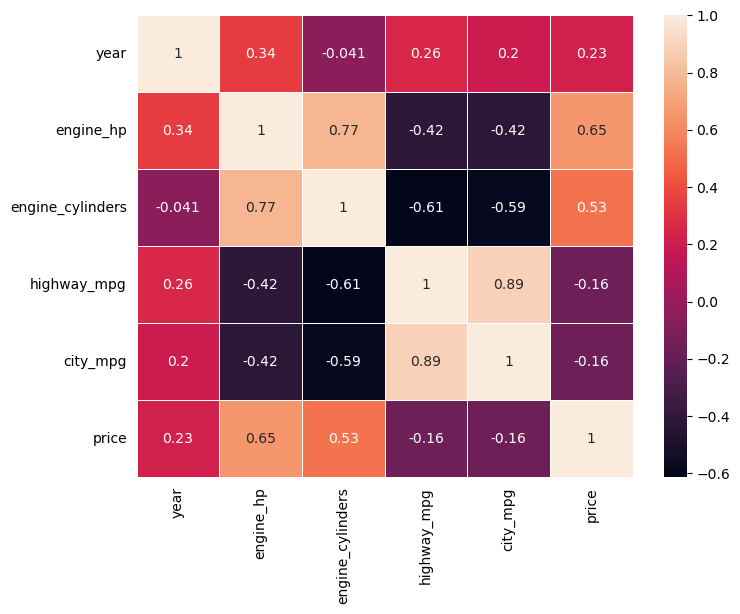

In [13]:
plt.figure(figsize = (8,6))
sns.heatmap(data[numerical_columns].corr(), annot=True, linewidth=0.5).tick_params(bottom=False, left=False);

- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`

### Make price binary

In [14]:
data["above_average"] = (data["price"] > data["price"].mean()).astype(int)
del data["price"]
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,1


### Split the data

In [15]:
data.columns[0:-1]

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X, y = data[data.columns[0:-1]], data["above_average"]

In [18]:
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

In [20]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Question 3
Which of these variables has the lowest mutual information score?

In [21]:
from sklearn.metrics import mutual_info_score

In [22]:
for col in categorical_columns:
    print(f"Mutual score between above_average and {col}:", round(mutual_info_score(y_train, X_train[col]), 2))

Mutual score between above_average and make: 0.24
Mutual score between above_average and model: 0.46
Mutual score between above_average and transmission_type: 0.02
Mutual score between above_average and vehicle_style: 0.08


Mutual score between `above_average` and `transmission_type` is the lowest

## Question 4
Train a logistic regression.
What accuracy did you get?

In [23]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [24]:
train_dicts = X_train.to_dict(orient="records")

In [25]:
dv = DictVectorizer(sparse=False)

In [26]:
X_train_one_hot = dv.fit_transform(train_dicts)

In [27]:
val_dicts = X_val.to_dict(orient="records")

In [28]:
X_val_one_hot = dv.transform(val_dicts)

In [29]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train_one_hot, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [30]:
y_pred = model.predict(X_val_one_hot)

In [31]:
round((y_val == y_pred).mean(), 2)

0.95

## Question 5
Which of following feature has the smallest difference?

In [32]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [33]:
dv.get_feature_names_out()[0], dv.get_feature_names_out()[2]

('city_mpg', 'engine_hp')

In [34]:
dv.get_feature_names_out()[-1], dv.get_feature_names_out()[-18:-23:-1]

('year',
 array(['transmission_type=UNKNOWN', 'transmission_type=MANUAL',
        'transmission_type=DIRECT_DRIVE', 'transmission_type=AUTOMATIC',
        'transmission_type=AUTOMATED_MANUAL'], dtype=object))

In [35]:
X_train["transmission_type"].unique()

array(['AUTOMATIC', 'MANUAL', 'AUTOMATED_MANUAL', 'UNKNOWN',
       'DIRECT_DRIVE'], dtype=object)

In [36]:
X_train_drop_year = np.delete(X_train_one_hot, [-1], axis=1)
X_train_drop_engine_hp = np.delete(X_train_one_hot, 2, axis=1)
X_train_drop_transmission_type = np.delete(X_train_one_hot, range(-18, -23, -1), axis=1)
X_train_drop_city_mpg = np.delete(X_train_one_hot, 0, axis=1)

In [37]:
X_val_drop_year = np.delete(X_val_one_hot, [-1], axis=1)
X_val_drop_engine_hp = np.delete(X_val_one_hot, 2, axis=1)
X_val_drop_transmission_type = np.delete(X_val_one_hot, range(-18, -23, -1), axis=1)
X_val_drop_city_mpg = np.delete(X_val_one_hot, 0, axis=1)

Dropped `year`

In [38]:
model_drop_year = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_drop_year.fit(X_train_drop_year, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [39]:
y_pred_drop_year = model_drop_year.predict(X_val_drop_year)

In [40]:
abs((y_val == y_pred).mean() - (y_val == y_pred_drop_year).mean())

0.0016785564414604215

Dropped `engine_hp`

In [41]:
model_drop_engine_hp = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_drop_engine_hp.fit(X_train_drop_engine_hp, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [42]:
y_pred_drop_engine_hp = model_drop_year.predict(X_val_drop_engine_hp)

In [43]:
abs((y_val == y_pred).mean() - (y_val == y_pred_drop_engine_hp).mean())

0.22366764582459087

Dropped `transmission_type`

In [44]:
model_drop_transmission_type = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_drop_transmission_type.fit(X_train_drop_transmission_type, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [45]:
y_pred_drop_transmission_type = model_drop_transmission_type.predict(X_val_drop_transmission_type)

In [46]:
abs((y_val == y_pred).mean() - (y_val == y_pred_drop_transmission_type).mean())

0.0012589173310951773

Dropped `city_mpg`

In [47]:
model_drop_city_mpg = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model_drop_city_mpg.fit(X_train_drop_city_mpg, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [48]:
y_pred_drop_city_mpg = model_drop_city_mpg.predict(X_val_drop_city_mpg)

In [49]:
abs((y_val == y_pred).mean() - (y_val == y_pred_drop_city_mpg).mean())

0.0004196391103650221

`city_mpg` smallest difference

## Question 6
Which of these alphas leads to the best RMSE on the validation set?

In [50]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
           'highway MPG', 'city mpg', 'MSRP']]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df = df.fillna(0)
df.rename(columns={'msrp': 'price'}, inplace=True)
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [52]:
X, y = df[df.columns[0:-1]], df["price"]

In [53]:
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

In [55]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [56]:
y_train_scaled = np.log1p(y_train)
y_val_scaled = np.log1p(y_val)
y_test_scaled = np.log1p(y_test)

In [57]:
train_dicts = X_train.to_dict(orient="records")

In [58]:
dv = DictVectorizer(sparse=False)

In [59]:
X_train_one_hot = dv.fit_transform(train_dicts)

In [60]:
val_dicts = X_val.to_dict(orient="records")

In [61]:
X_val_one_hot = dv.transform(val_dicts)

In [62]:
alphas = [0, 0.01, 0.1, 1, 10]

for alpha in alphas:
    model_Ridge = Ridge(alpha=alpha, solver="sag", random_state=42)
    model_Ridge.fit(X_train_one_hot, y_train_scaled.values.reshape(-1,1))
    y_pred = model_Ridge.predict(X_val_one_hot)
    y_pred = np.expm1(y_pred)
    print(f"RMSE when alpha = {alpha} is", mean_squared_error(y_val, y_pred, squared=False))

RMSE when alpha = 0 is 50682.33968594183
RMSE when alpha = 0.01 is 50682.353049842546
RMSE when alpha = 0.1 is 50682.47332041266
RMSE when alpha = 1 is 50683.67563373994
RMSE when alpha = 10 is 50700.18037935538
